In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from pandas import Series, DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.exceptions import ConvergenceWarning
import patsy
import re
import warnings



In [2]:
zingat = pd.read_excel("zingat_house_price_prediction.xlsx", index_col=0)
zingat

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
0,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,18
1,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9.000,130,145,3+1,1,24
2,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,9
3,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
4,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,2
...,...,...,...,...,...,...,...,...
865,TRABZON'DA KİRALIK EŞYALI DAİRE,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6
866,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
867,TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...,Kemerkaya Ortahisar\n Trabzon,22.500,90,100,2+1,1,5
868,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6


In [3]:
df = pd.DataFrame(zingat)
df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
0,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,18
1,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9.000,130,145,3+1,1,24
2,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,9
3,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
4,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,2
...,...,...,...,...,...,...,...,...
865,TRABZON'DA KİRALIK EŞYALI DAİRE,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6
866,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
867,TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...,Kemerkaya Ortahisar\n Trabzon,22.500,90,100,2+1,1,5
868,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6


# General Information About Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   İLAN ADI         870 non-null    object
 1   MAHALLE          870 non-null    object
 2   FİYAT            870 non-null    object
 3   NET(m²)          870 non-null    int64 
 4   BRÜT(m²)         870 non-null    int64 
 5   ODA              870 non-null    object
 6   BANYO SAYISI     870 non-null    int64 
 7   FOTOĞRAF SAYISI  870 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 61.2+ KB


In [5]:
df.isnull().sum()

İLAN ADI           0
MAHALLE            0
FİYAT              0
NET(m²)            0
BRÜT(m²)           0
ODA                0
BANYO SAYISI       0
FOTOĞRAF SAYISI    0
dtype: int64

In [6]:
df.head()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
0,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,18
1,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9.000,130,145,3+1,1,24
2,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,9
3,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
4,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,2


In [7]:
df.tail()

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
865,TRABZON'DA KİRALIK EŞYALI DAİRE,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6
866,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
867,TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...,Kemerkaya Ortahisar\n Trabzon,22.500,90,100,2+1,1,5
868,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,6
869,TRABZONDA KİRALIK DAİRE,Ortahisar Ortahisar\n Trabzon,8.500,120,130,3+1,1,14


In [8]:
df.sample(10, random_state = 43)

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
409,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9.000,130,145,3+1,1,24
425,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,4
250,KAÇMAZ EMLAKTAN TRABZON 1.NOLU BEŞİRLİ MAH KIR...,1 Nolu Beşirli Ortahisar\n Trabzon,20.000,230,250,5+2,2,35
729,TRABZON YALINCAK 4+1 EŞYALI KİRALIK DAİRE,Yalıncak Ortahisar\n Trabzon,30.000,200,210,4+1,3,34
67,TRABZONDA LÜKS EŞYALI 3+1 KİRALIK DAİRE,2 Nolu Bostancı Ortahisar\n Trabzon,12.000,135,150,3+1,1,8
11,"YENİMAHALLE'DE, MUHTEŞEM KONUMDA, 3+1, KİRALIK...",Yenimahalle Ortahisar\n Trabzon,12.000,120,125,3+1,1,13
829,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9.000,130,145,3+1,1,24
559,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8.500,40,50,1+1,1,2
186,TRABZON SANAYİ MAH.DE EŞYALI KİRALIK LÜKS DAİR...,Sanayi Ortahisar\n Trabzon,8.000,60,70,2+1,1,25
249,TRABZON SANAYİ MAH.DE EŞYALI KİRALIK LÜKS DAİR...,Sanayi Ortahisar\n Trabzon,8.000,60,70,2+1,1,25


## Reorganize Data

In [9]:
photo_median = df.iloc[:,-1].median()
photo_median

13.0

In [10]:
df.iloc[:,-1].fillna(photo_median, inplace=True)

In [11]:
net_median = df["NET(m²)"].median()
net_median

90.0

In [12]:
df["NET(m²)"].fillna(net_median, inplace=True)

In [13]:
df['ODA'] = df['ODA'].apply(lambda x: eval(str(x)))
print(df)

                                              İLAN ADI  \
0         TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   
1                              Trabzonda Kiralık Daire   
2         TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   
3    TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...   
4    TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...   
..                                                 ...   
865                    TRABZON'DA KİRALIK EŞYALI DAİRE   
866       TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   
867  TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...   
868       TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   
869                            TRABZONDA KİRALIK DAİRE   

                           MAHALLE   FİYAT  NET(m²)  BRÜT(m²)  ODA  \
0     Kalkınma Ortahisar\n Trabzon   8.500       40        50    2   
1        İnönü Ortahisar\n Trabzon   9.000      130       145    4   
2     Kalkınma Ortahisar\n Trabzon   8.500       40        50    2   
3     Kalkınma Ortahisa

In [14]:
salon_median = df["ODA"].median()
salon_median

3.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   İLAN ADI         870 non-null    object
 1   MAHALLE          870 non-null    object
 2   FİYAT            870 non-null    object
 3   NET(m²)          870 non-null    int64 
 4   BRÜT(m²)         870 non-null    int64 
 5   ODA              870 non-null    int64 
 6   BANYO SAYISI     870 non-null    int64 
 7   FOTOĞRAF SAYISI  870 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 61.2+ KB


In [16]:
df["FİYAT"] = df["FİYAT"].apply(lambda x : str(x).replace(".","")).astype(int)
df["NET(m²)"] = df["NET(m²)"].astype(int)
df["BANYO SAYISI"] = df["BANYO SAYISI"].apply(lambda x : str(x).replace("0  TL  (aylık)",""))
df["ODA"] = df["ODA"].astype(int)
df["BANYO SAYISI"] = df["BANYO SAYISI"].astype(int)
df["FOTOĞRAF SAYISI"] = df["FOTOĞRAF SAYISI"].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   İLAN ADI         870 non-null    object
 1   MAHALLE          870 non-null    object
 2   FİYAT            870 non-null    int32 
 3   NET(m²)          870 non-null    int32 
 4   BRÜT(m²)         870 non-null    int64 
 5   ODA              870 non-null    int32 
 6   BANYO SAYISI     870 non-null    int32 
 7   FOTOĞRAF SAYISI  870 non-null    int32 
dtypes: int32(5), int64(1), object(2)
memory usage: 44.2+ KB


In [18]:
df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI
0,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,18
1,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9000,130,145,4,1,24
2,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,9
3,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,4
4,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,2
...,...,...,...,...,...,...,...,...
865,TRABZON'DA KİRALIK EŞYALI DAİRE,Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,6
866,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,4
867,TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...,Kemerkaya Ortahisar\n Trabzon,22500,90,100,3,1,5
868,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,2,1,6


In [19]:
mask = (df["FİYAT"] > 25000000)
df[mask]

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI


In [20]:
another_df = df.drop(columns= "ODA")
another_df

,İLAN ADI,MAHALLE,FİYAT,NET(m²),BRÜT(m²),BANYO SAYISI,FOTOĞRAF SAYISI
0,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,1,18
1,Trabzonda Kiralık Daire,İnönü Ortahisar\n Trabzon,9000,130,145,1,24
2,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,1,9
3,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8500,40,50,1,4
4,TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...,Kalkınma Ortahisar\n Trabzon,8500,40,50,1,2
...,...,...,...,...,...,...,...
865,TRABZON'DA KİRALIK EŞYALI DAİRE,Kalkınma Ortahisar\n Trabzon,8500,40,50,1,6
866,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,1,4
867,TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...,Kemerkaya Ortahisar\n Trabzon,22500,90,100,1,5
868,TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL),Kalkınma Ortahisar\n Trabzon,8500,40,50,1,6


In [21]:
DF = another_df.iloc[:,2:]
DF

,FİYAT,NET(m²),BRÜT(m²),BANYO SAYISI,FOTOĞRAF SAYISI
0,8500,40,50,1,18
1,9000,130,145,1,24
2,8500,40,50,1,9
3,8500,40,50,1,4
4,8500,40,50,1,2
...,...,...,...,...,...
865,8500,40,50,1,6
866,8500,40,50,1,4
867,22500,90,100,1,5
868,8500,40,50,1,6


In [22]:
df['MAHALLE'] = df['MAHALLE'].apply(lambda x: x.split()[0] if isinstance(x, str) else x)
print(df)

                                              İLAN ADI    MAHALLE  FİYAT  \
0         TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   Kalkınma   8500   
1                              Trabzonda Kiralık Daire      İnönü   9000   
2         TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   Kalkınma   8500   
3    TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...   Kalkınma   8500   
4    TRABZON KALKINMA KİRALIK EŞYALI DAİRE(HERŞEY D...   Kalkınma   8500   
..                                                 ...        ...    ...   
865                    TRABZON'DA KİRALIK EŞYALI DAİRE   Kalkınma   8500   
866       TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   Kalkınma   8500   
867  TRABZON MERKEZ MEYDAN DA FULL EŞYALI KİRALIK D...  Kemerkaya  22500   
868       TRABZONDA KİRALIK EŞYALI DAİRE(HERŞEY DAHİL)   Kalkınma   8500   
869                            TRABZONDA KİRALIK DAİRE  Ortahisar   8500   

     NET(m²)  BRÜT(m²)  ODA  BANYO SAYISI  FOTOĞRAF SAYISI  
0         40        50    

In [23]:
df["MAHALLE"].unique()

array(['Kalkınma', 'İnönü', 'Yalıncak', 'Pelitli', 'Kemerkaya', 'Sanayi',
       '1', 'Yenimahalle', 'Konaklar', 'Çukurçayır', 'Karşıyaka',
       'Ortahisar', 'Gazipaşa', '2', 'Üniversite', 'Fatih', '3',
       'Aydınlıkevler', 'Gülbaharhatun', 'Kaymaklı', 'Yenicuma',
       'Soğuksu', 'İskenderpaşa', 'Pazarkapı', 'Çilekli', 'Cumhuriyet',
       'Boztepe'], dtype=object)

In [24]:
new_df = pd.get_dummies(df, columns=["MAHALLE"])
new_df.drop(columns="İLAN ADI", inplace=True)
new_df

,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_1,MAHALLE_2,MAHALLE_3,MAHALLE_Aydınlıkevler,...,MAHALLE_Sanayi,MAHALLE_Soğuksu,MAHALLE_Yalıncak,MAHALLE_Yenicuma,MAHALLE_Yenimahalle,MAHALLE_Çilekli,MAHALLE_Çukurçayır,MAHALLE_Üniversite,MAHALLE_İnönü,MAHALLE_İskenderpaşa
0,8500,40,50,2,1,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9000,130,145,4,1,24,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8500,40,50,2,1,9,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8500,40,50,2,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8500,40,50,2,1,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,8500,40,50,2,1,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
866,8500,40,50,2,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
867,22500,90,100,3,1,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
868,8500,40,50,2,1,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
df['FİYAT'] = df['FİYAT'].apply(lambda x: re.findall(r'\d+\.?\d*', str(x)))
df['FİYAT'] = df['FİYAT'].apply(lambda x: float(x[0]) if x else None)
df['FİYAT'].fillna(df['FİYAT'].median(), inplace=True)

In [26]:
new_df.sort_values("FİYAT")

,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_1,MAHALLE_2,MAHALLE_3,MAHALLE_Aydınlıkevler,...,MAHALLE_Sanayi,MAHALLE_Soğuksu,MAHALLE_Yalıncak,MAHALLE_Yenicuma,MAHALLE_Yenimahalle,MAHALLE_Çilekli,MAHALLE_Çukurçayır,MAHALLE_Üniversite,MAHALLE_İnönü,MAHALLE_İskenderpaşa
82,3250,100,130,3,1,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
210,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
315,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
651,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,30000,200,210,5,3,34,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
519,30000,200,210,5,3,34,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
750,30000,200,210,5,3,34,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
39,35000,78,95,3,1,35,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [27]:
new_df.iloc[138:139,0:1] = int(850000)
new_df.iloc[3:4,0:1] = int(850000)
new_df.iloc[45:46,0:1] = int(900000)
new_df.iloc[126:127,0:1] = int(940000)

In [28]:
new_df.sort_values("FİYAT")

,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_1,MAHALLE_2,MAHALLE_3,MAHALLE_Aydınlıkevler,...,MAHALLE_Sanayi,MAHALLE_Soğuksu,MAHALLE_Yalıncak,MAHALLE_Yenicuma,MAHALLE_Yenimahalle,MAHALLE_Çilekli,MAHALLE_Çukurçayır,MAHALLE_Üniversite,MAHALLE_İnönü,MAHALLE_İskenderpaşa
82,3250,100,130,3,1,18,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
462,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
315,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
168,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
231,4000,140,155,4,1,19,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,850000,40,50,2,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,850000,40,50,2,1,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
45,900000,75,85,3,1,23,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
126,940000,90,95,3,1,9,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Exploratory Data Analysis

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 870 entries, 0 to 869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   İLAN ADI         870 non-null    object 
 1   MAHALLE          870 non-null    object 
 2   FİYAT            870 non-null    float64
 3   NET(m²)          870 non-null    int32  
 4   BRÜT(m²)         870 non-null    int64  
 5   ODA              870 non-null    int32  
 6   BANYO SAYISI     870 non-null    int32  
 7   FOTOĞRAF SAYISI  870 non-null    int32  
dtypes: float64(1), int32(4), int64(1), object(2)
memory usage: 47.6+ KB


<Axes: title={'center': 'ORTAHİSAR İLÇESİNDEKİ EV FİYATLARININ DAĞILIMI'}, xlabel='FİYAT', ylabel='Count'>

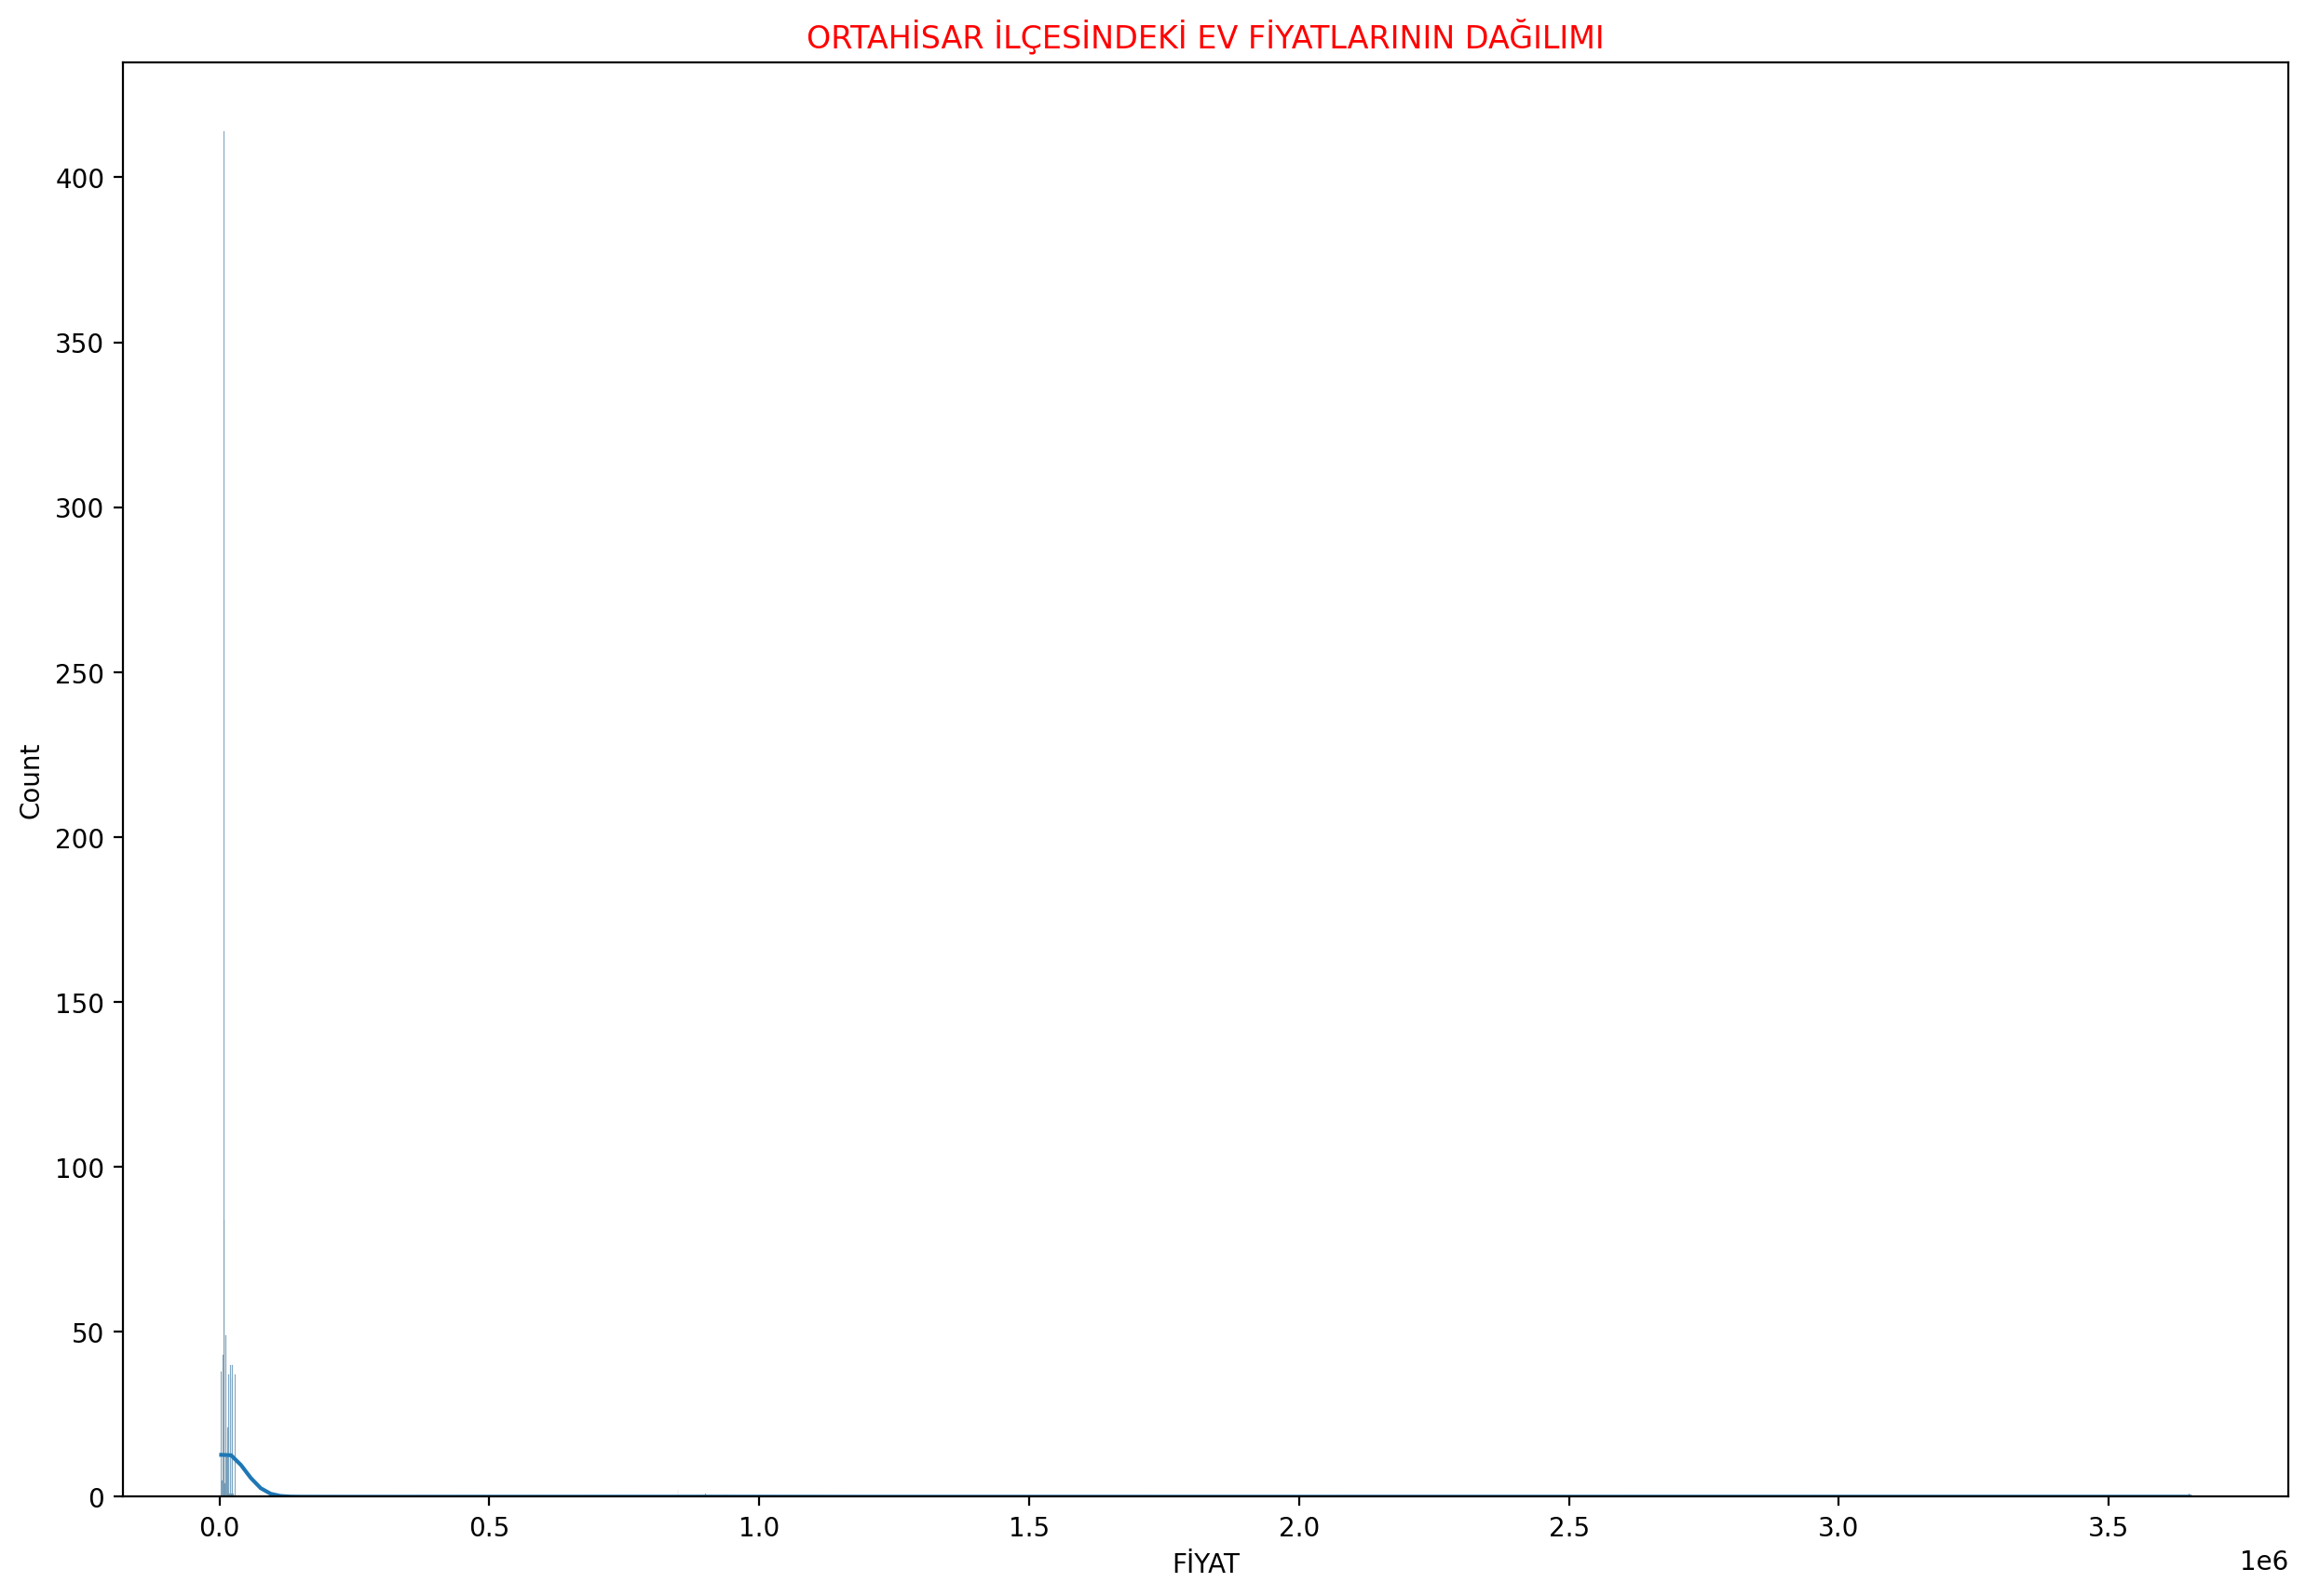

In [30]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ORTAHİSAR İLÇESİNDEKİ EV FİYATLARININ DAĞILIMI", c="red")
sns.histplot(data=new_df, x="FİYAT", kde=True)

In [31]:
oda = df.groupby("ODA").count().reset_index().iloc[:,:2]
oda

,ODA,İLAN ADI
0,1,3
1,2,337
2,3,152
3,4,296
4,5,44
5,6,2
6,7,36


Text(0, 0.5, 'İLAN SAYISI')

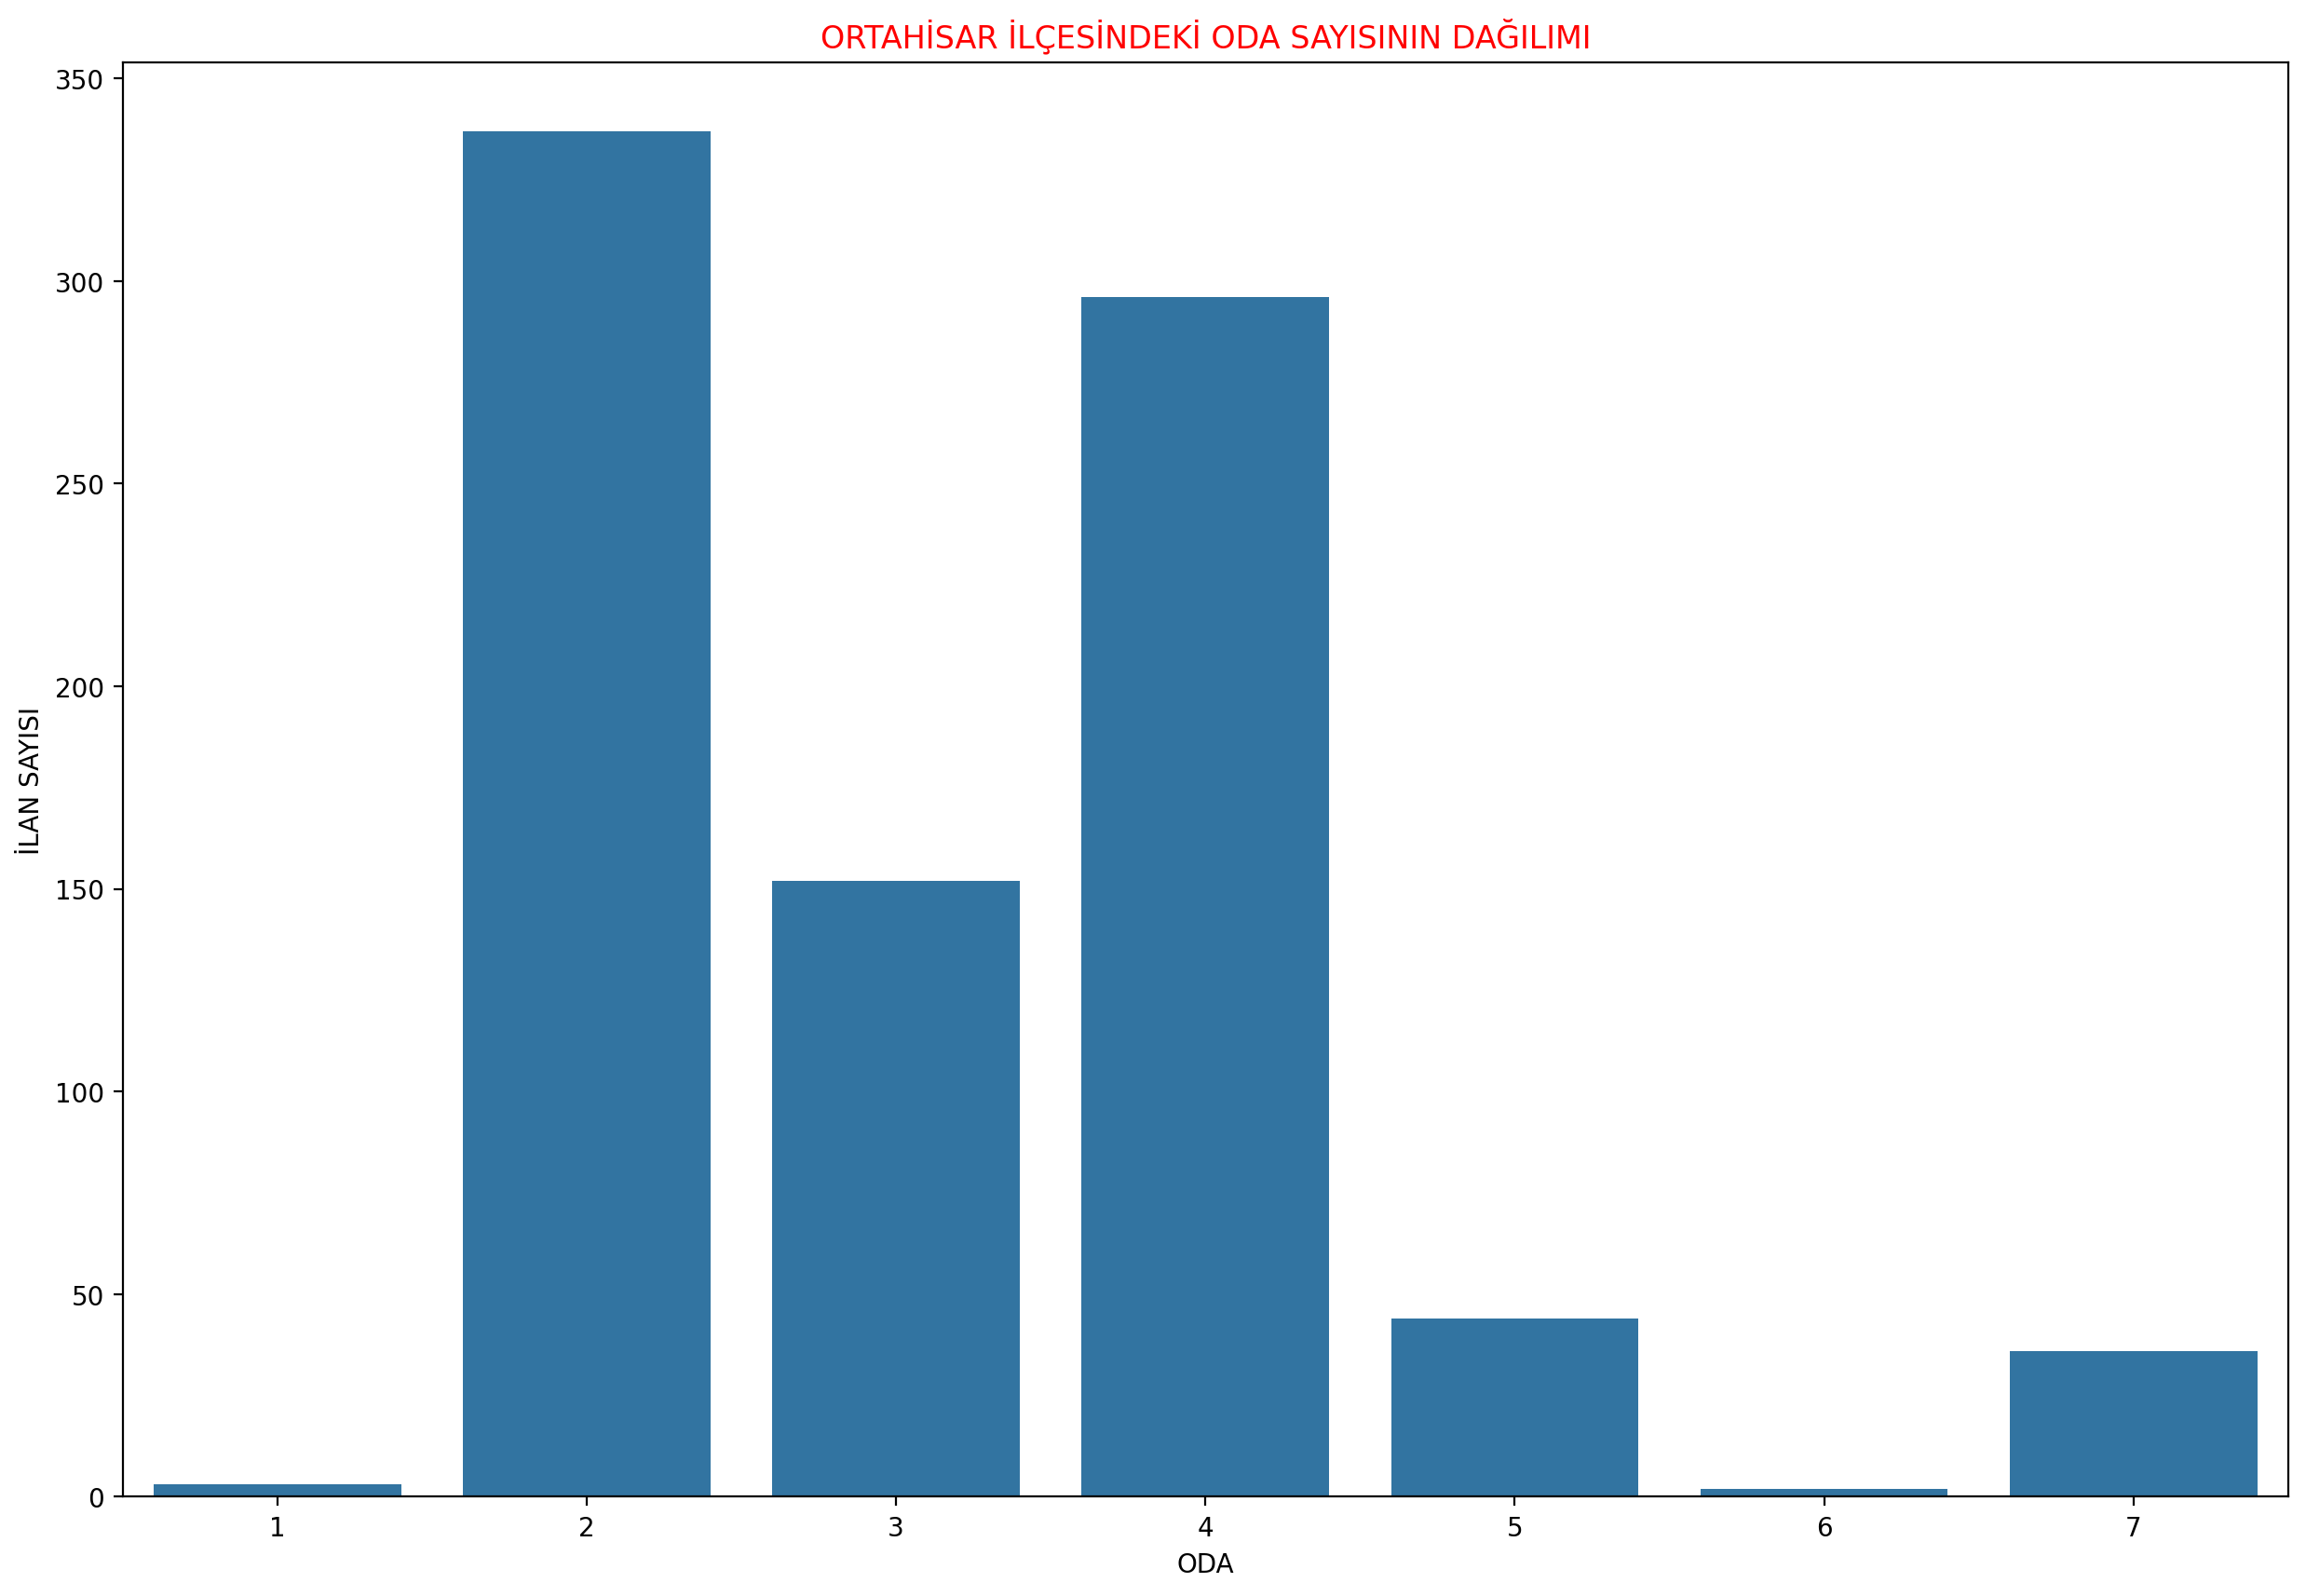

In [32]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ORTAHİSAR İLÇESİNDEKİ ODA SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'ODA', y = 'İLAN ADI', data = oda)
plt.ylabel("İLAN SAYISI")

In [33]:
banyo = df.groupby("BANYO SAYISI").count().iloc[:,0:1].reset_index()
banyo

,BANYO SAYISI,İLAN ADI
0,1,728
1,2,102
2,3,40


Text(0, 0.5, 'İLAN SAYISI')

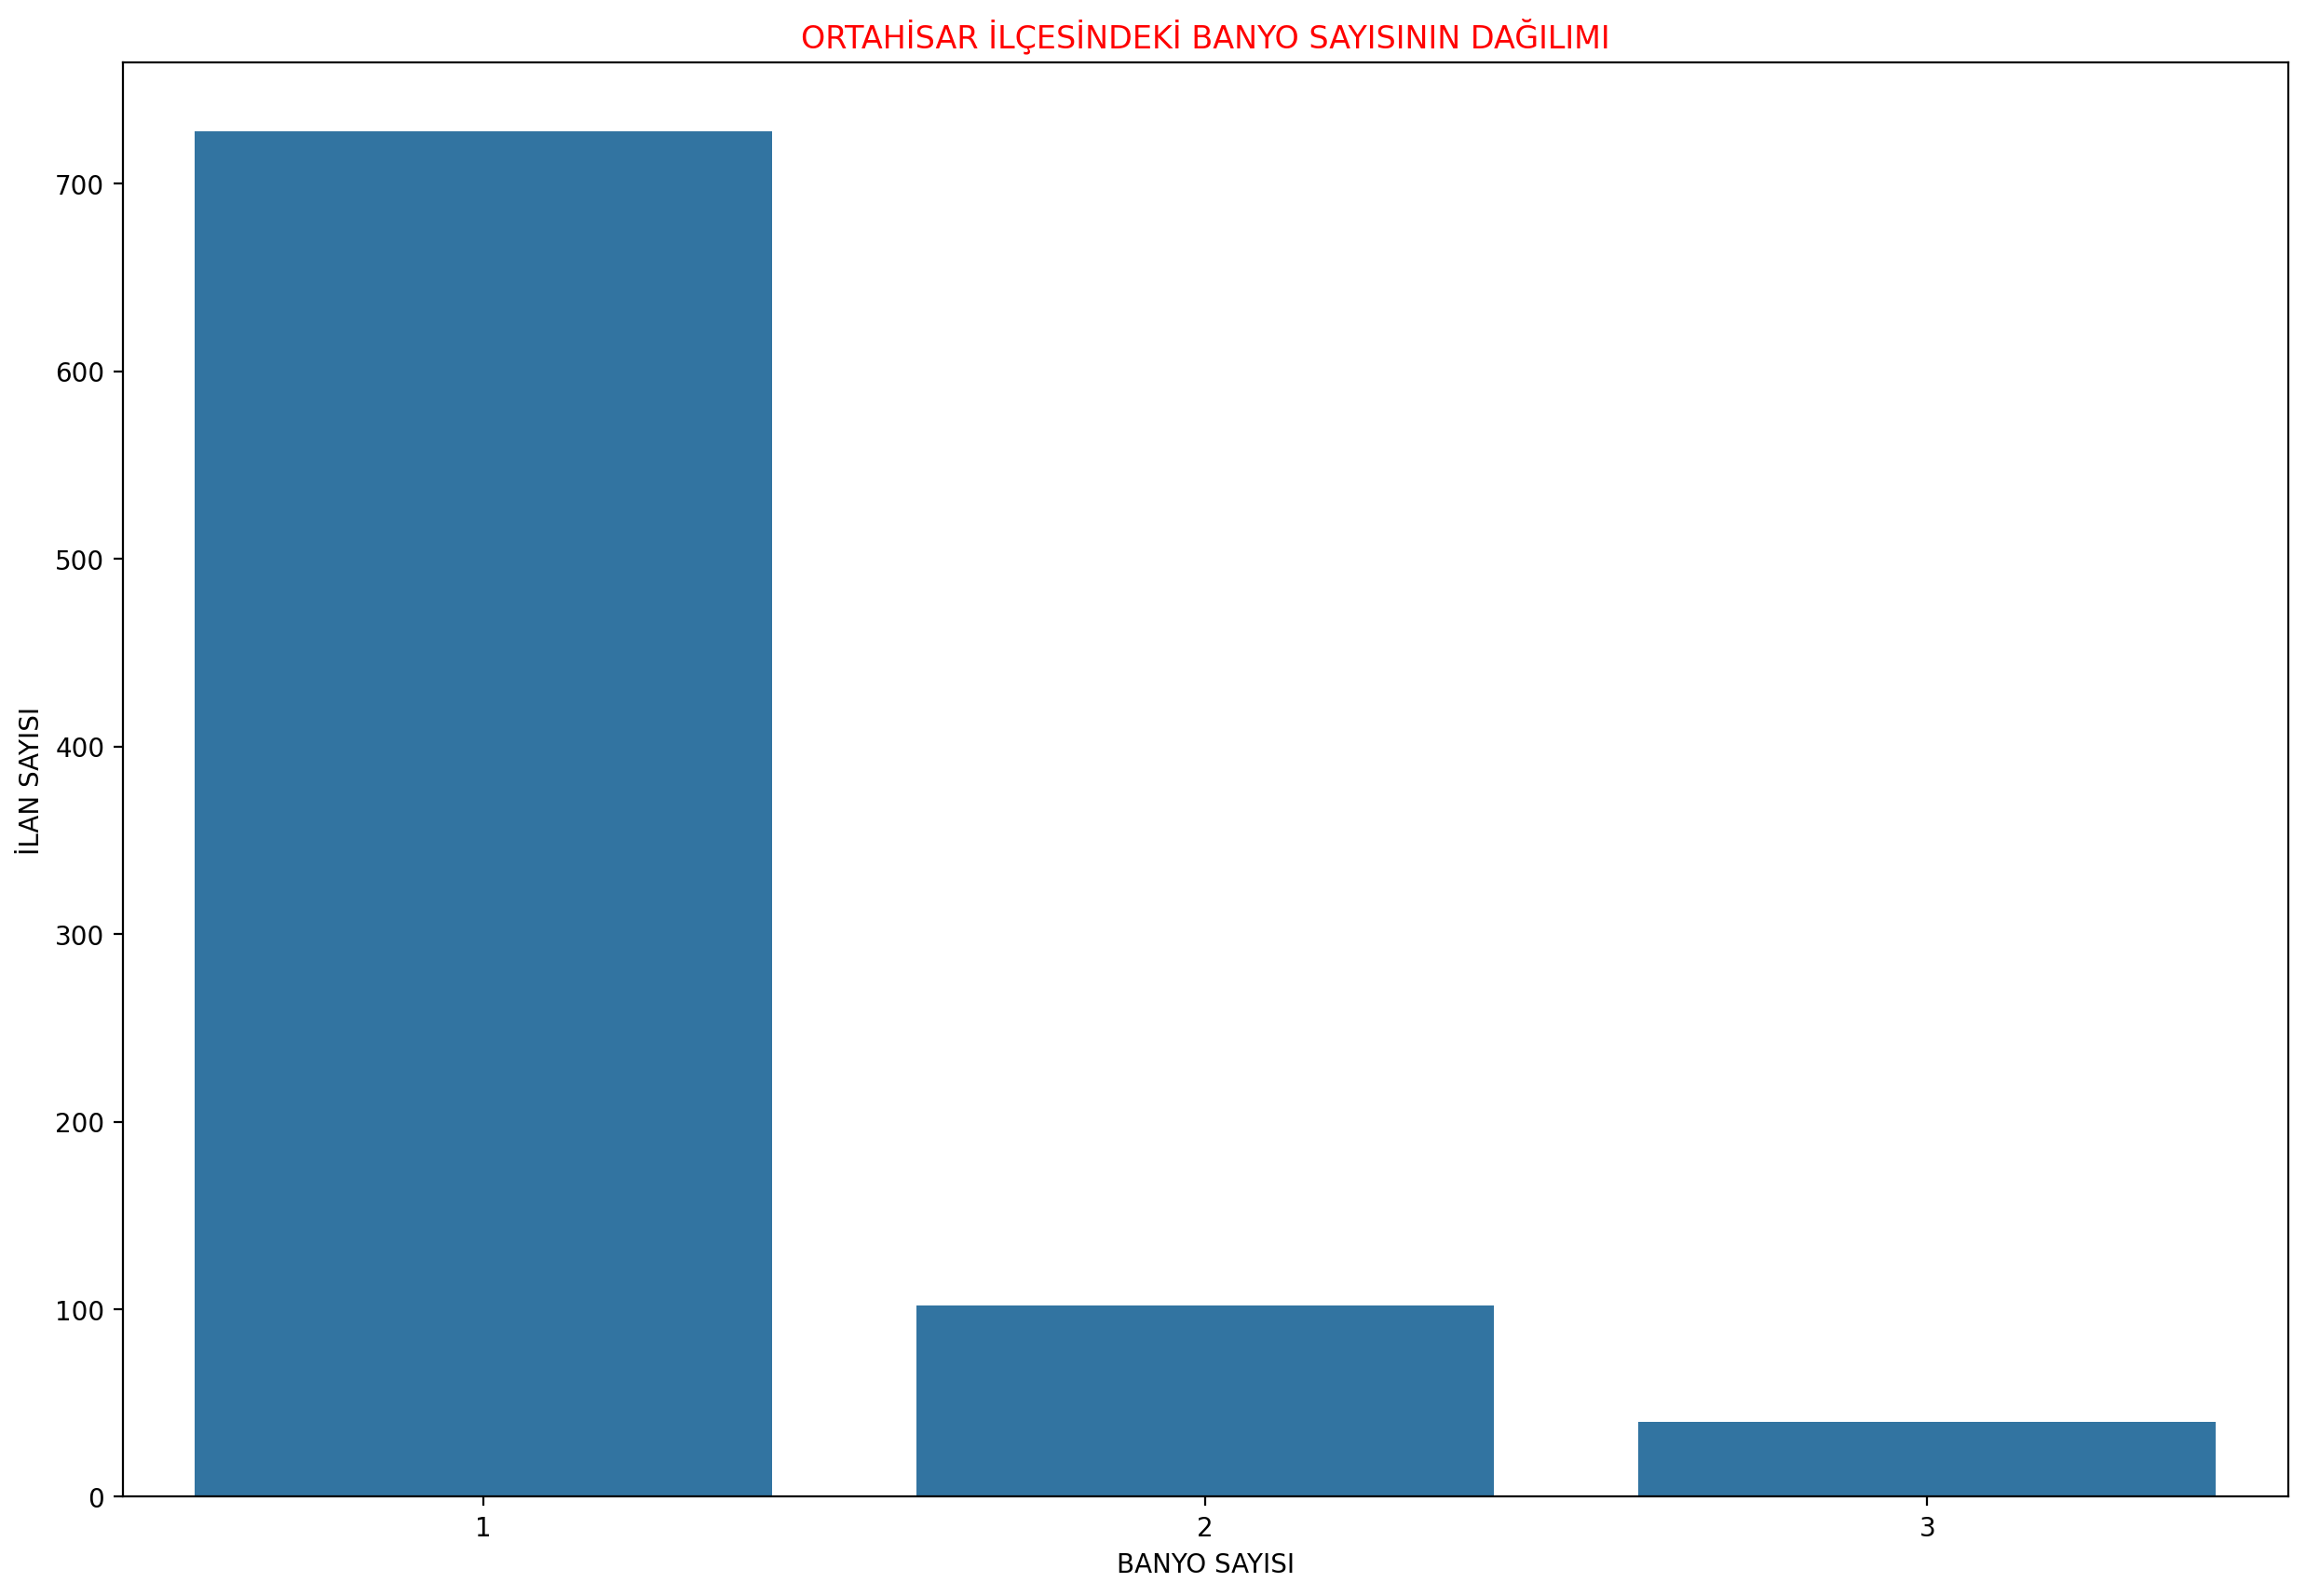

In [34]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("ORTAHİSAR İLÇESİNDEKİ BANYO SAYISININ DAĞILIMI", c="red")
sns.barplot(x = 'BANYO SAYISI', y = 'İLAN ADI', data = banyo)
plt.ylabel("İLAN SAYISI")

In [35]:
mahalle = df.groupby("MAHALLE").count().iloc[:,0:1].reset_index().head(10)
mahalle_sort = mahalle.sort_values("İLAN ADI", ascending=False)
mahalle_sort

,MAHALLE,İLAN ADI
9,Kalkınma,296
0,1,40
1,2,8
7,Gazipaşa,4
5,Cumhuriyet,3
3,Aydınlıkevler,2
4,Boztepe,2
6,Fatih,2
8,Gülbaharhatun,2
2,3,1


Text(0, 0.5, 'İLAN SAYISI')

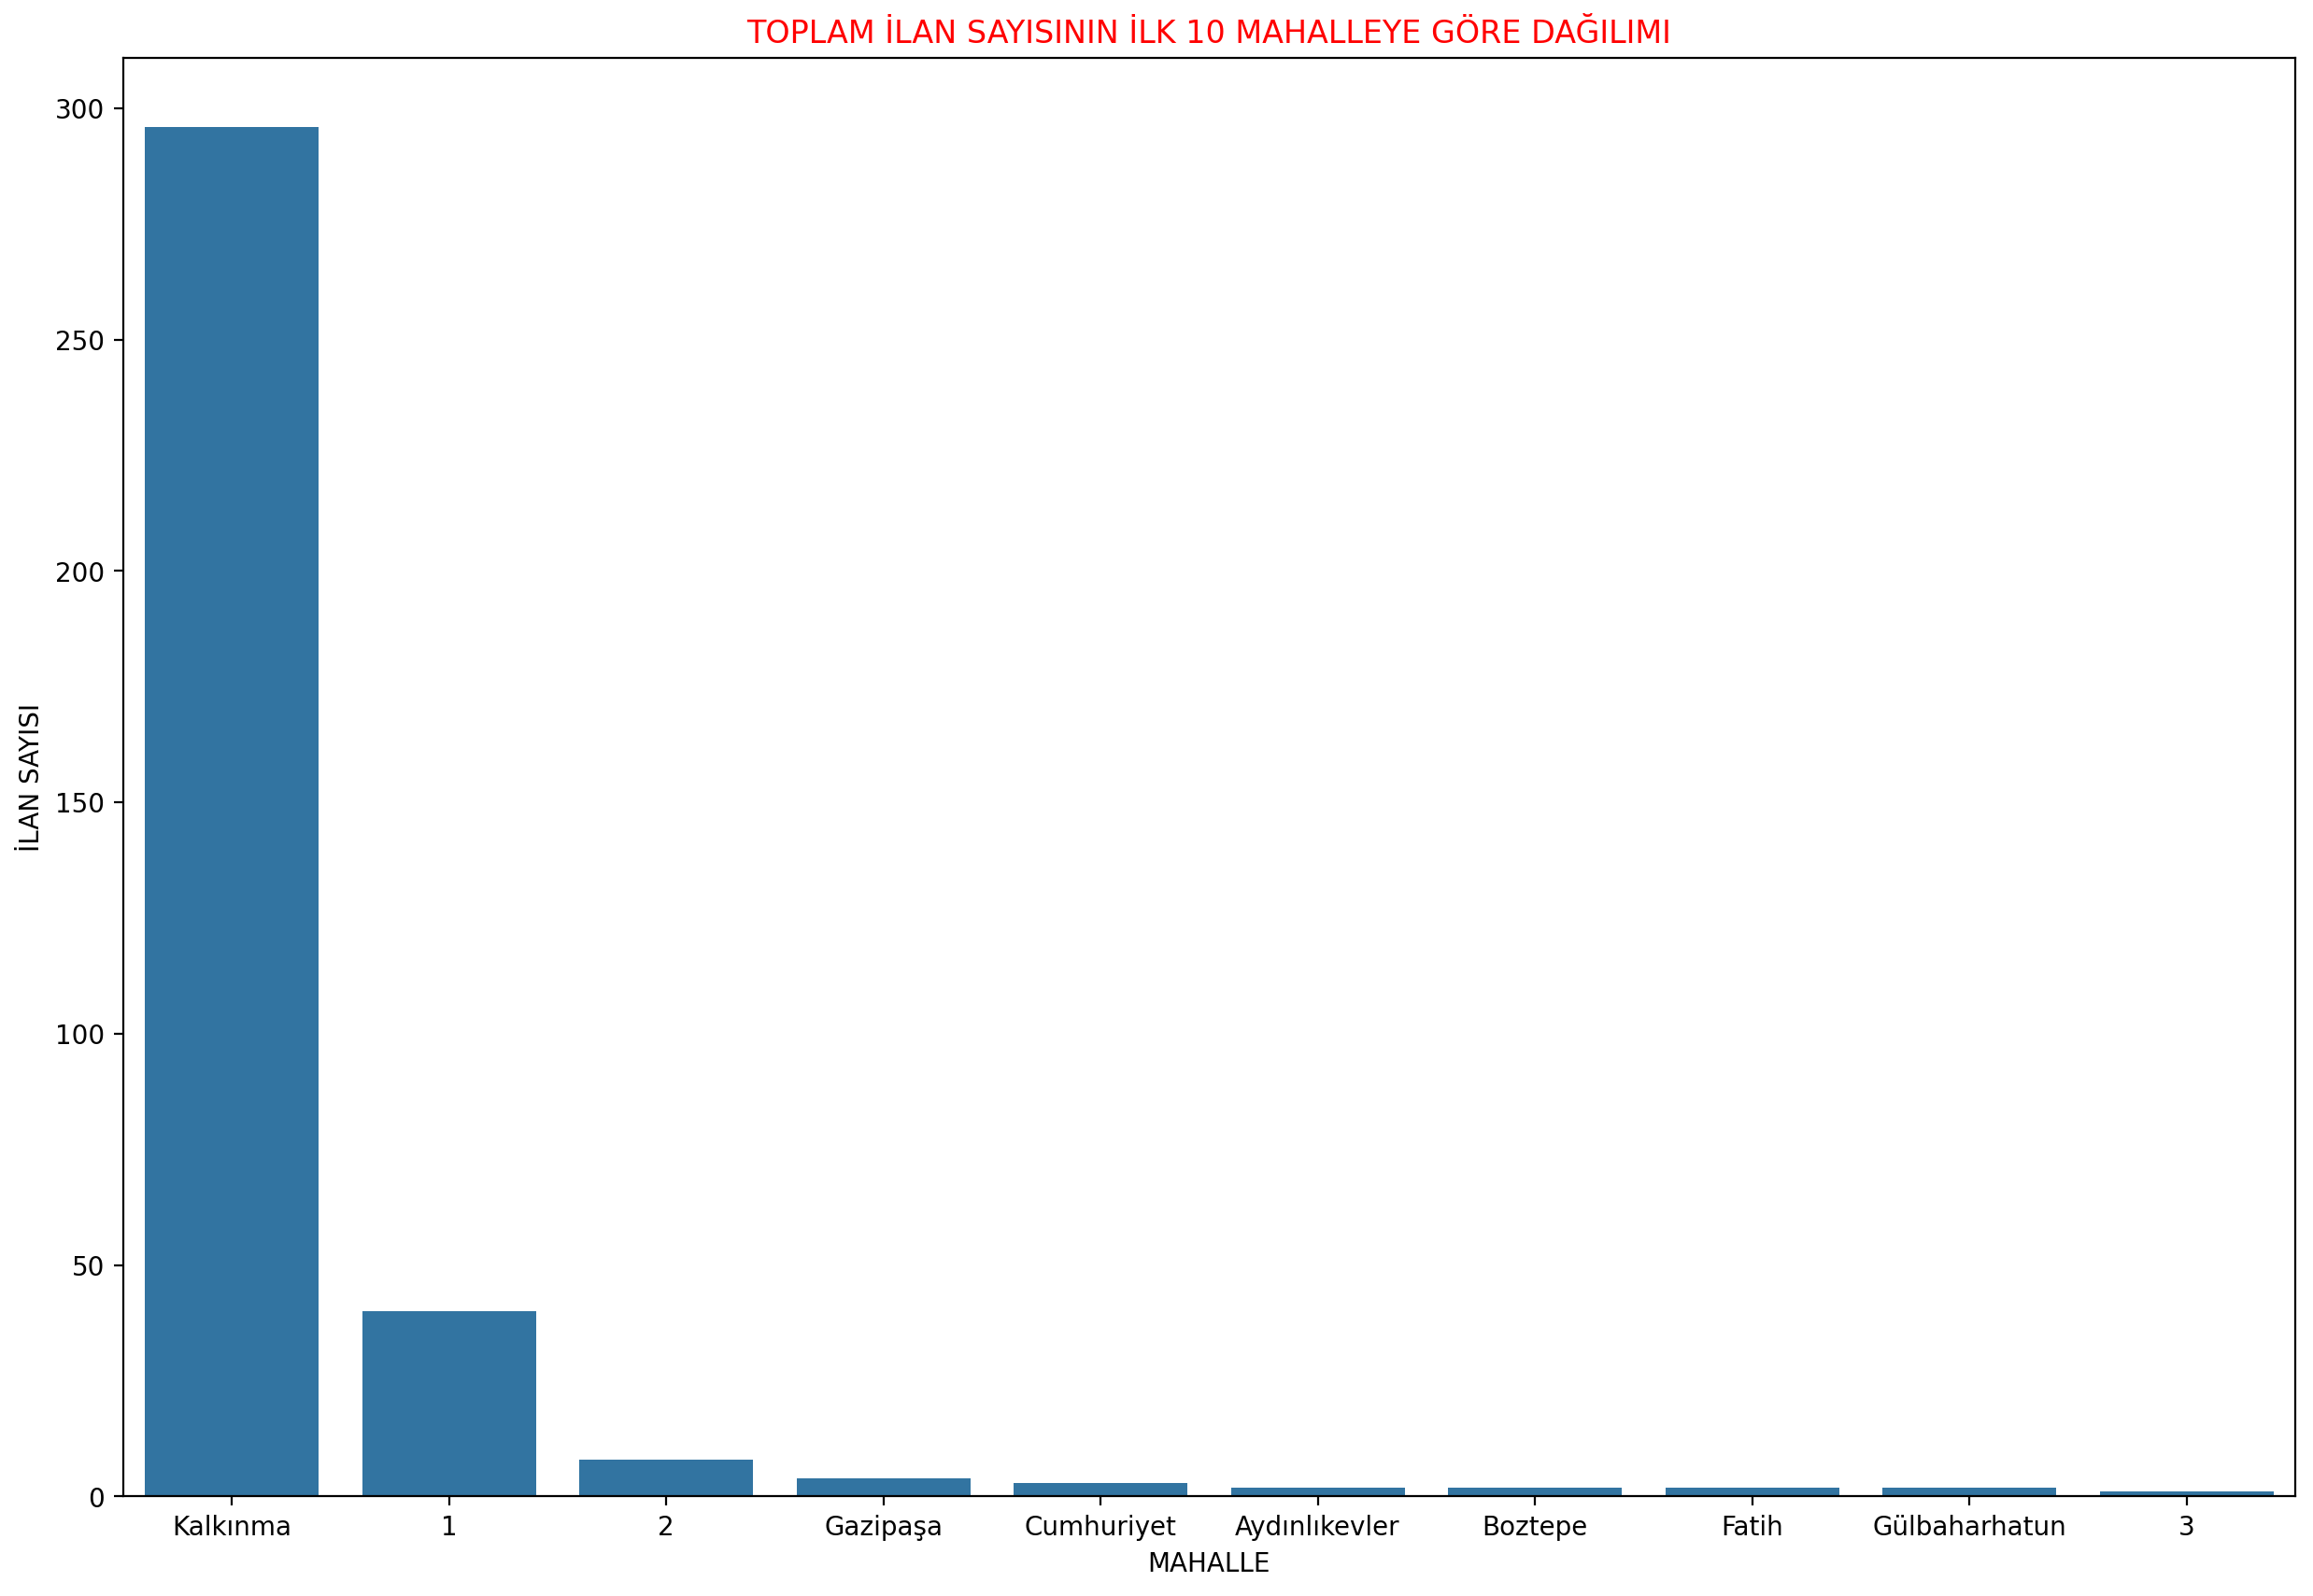

In [36]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("TOPLAM İLAN SAYISININ İLK 10 MAHALLEYE GÖRE DAĞILIMI", c="red")
sns.barplot(x = 'MAHALLE', y = 'İLAN ADI', data = mahalle_sort)
plt.ylabel("İLAN SAYISI")

In [37]:
new_df.corr()

,FİYAT,NET(m²),BRÜT(m²),ODA,BANYO SAYISI,FOTOĞRAF SAYISI,MAHALLE_1,MAHALLE_2,MAHALLE_3,MAHALLE_Aydınlıkevler,...,MAHALLE_Sanayi,MAHALLE_Soğuksu,MAHALLE_Yalıncak,MAHALLE_Yenicuma,MAHALLE_Yenimahalle,MAHALLE_Çilekli,MAHALLE_Çukurçayır,MAHALLE_Üniversite,MAHALLE_İnönü,MAHALLE_İskenderpaşa
FİYAT,1.000000,0.038197,0.037334,0.028308,0.012443,0.006117,-0.001465,0.316055,-0.002012,-0.002146,...,-0.018402,-0.002136,0.010984,-0.002012,-0.012325,-0.001516,-0.005225,-0.006362,-0.017126,-0.004252
NET(m²),0.038197,1.000000,0.993042,0.962153,0.694446,0.768455,0.474747,0.062499,-0.004308,0.036461,...,-0.136903,0.055842,0.374366,-0.022353,0.084133,0.022759,0.182605,-0.017744,0.118675,-0.029502
BRÜT(m²),0.037334,0.993042,1.000000,0.956321,0.694969,0.773667,0.474999,0.058913,0.000466,0.049794,...,-0.136601,0.051697,0.360090,-0.022304,0.055148,0.023235,0.186440,-0.016817,0.123328,-0.030755
ODA,0.028308,0.962153,0.956321,1.000000,0.606034,0.768860,0.603824,0.050263,-0.005928,0.010716,...,-0.036307,0.048077,0.284465,-0.032931,0.129072,0.021074,0.133217,-0.037494,0.126397,-0.027493
BANYO SAYISI,0.012443,0.694446,0.694969,0.606034,1.000000,0.665977,0.298919,0.031484,-0.013988,0.027515,...,-0.085670,0.052877,0.690654,-0.013988,-0.085670,-0.013988,-0.041762,-0.001378,-0.086904,-0.019793
FOTOĞRAF SAYISI,0.006117,0.768455,0.773667,0.768860,0.665977,1.000000,0.417178,0.058986,0.022494,0.036708,...,0.222221,0.032836,0.430649,-0.022320,-0.031136,-0.022320,-0.003995,0.028782,0.193006,-0.036461
MAHALLE_1,-0.001465,0.474747,0.474999,0.603824,0.298919,0.417178,1.000000,-0.021149,-0.007447,-0.010538,...,-0.045610,-0.007447,-0.055914,-0.007447,-0.045610,-0.007447,-0.050058,-0.016690,-0.046267,-0.010538
MAHALLE_2,0.316055,0.062499,0.058913,0.050263,0.031484,0.058986,-0.021149,1.000000,-0.003268,-0.004624,...,-0.020015,-0.003268,-0.024537,-0.003268,-0.020015,-0.003268,-0.021967,-0.007324,-0.020303,-0.004624
MAHALLE_3,-0.002012,-0.004308,0.000466,-0.005928,-0.013988,0.022494,-0.007447,-0.003268,1.000000,-0.001628,...,-0.007048,-0.001151,-0.008640,-0.001151,-0.007048,-0.001151,-0.007735,-0.002579,-0.007149,-0.001628
MAHALLE_Aydınlıkevler,-0.002146,0.036461,0.049794,0.010716,0.027515,0.036708,-0.010538,-0.004624,-0.001628,1.000000,...,-0.009973,-0.001628,-0.012226,-0.001628,-0.009973,-0.001628,-0.010946,-0.003649,-0.010117,-0.002304


<Axes: title={'center': 'EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ'}>

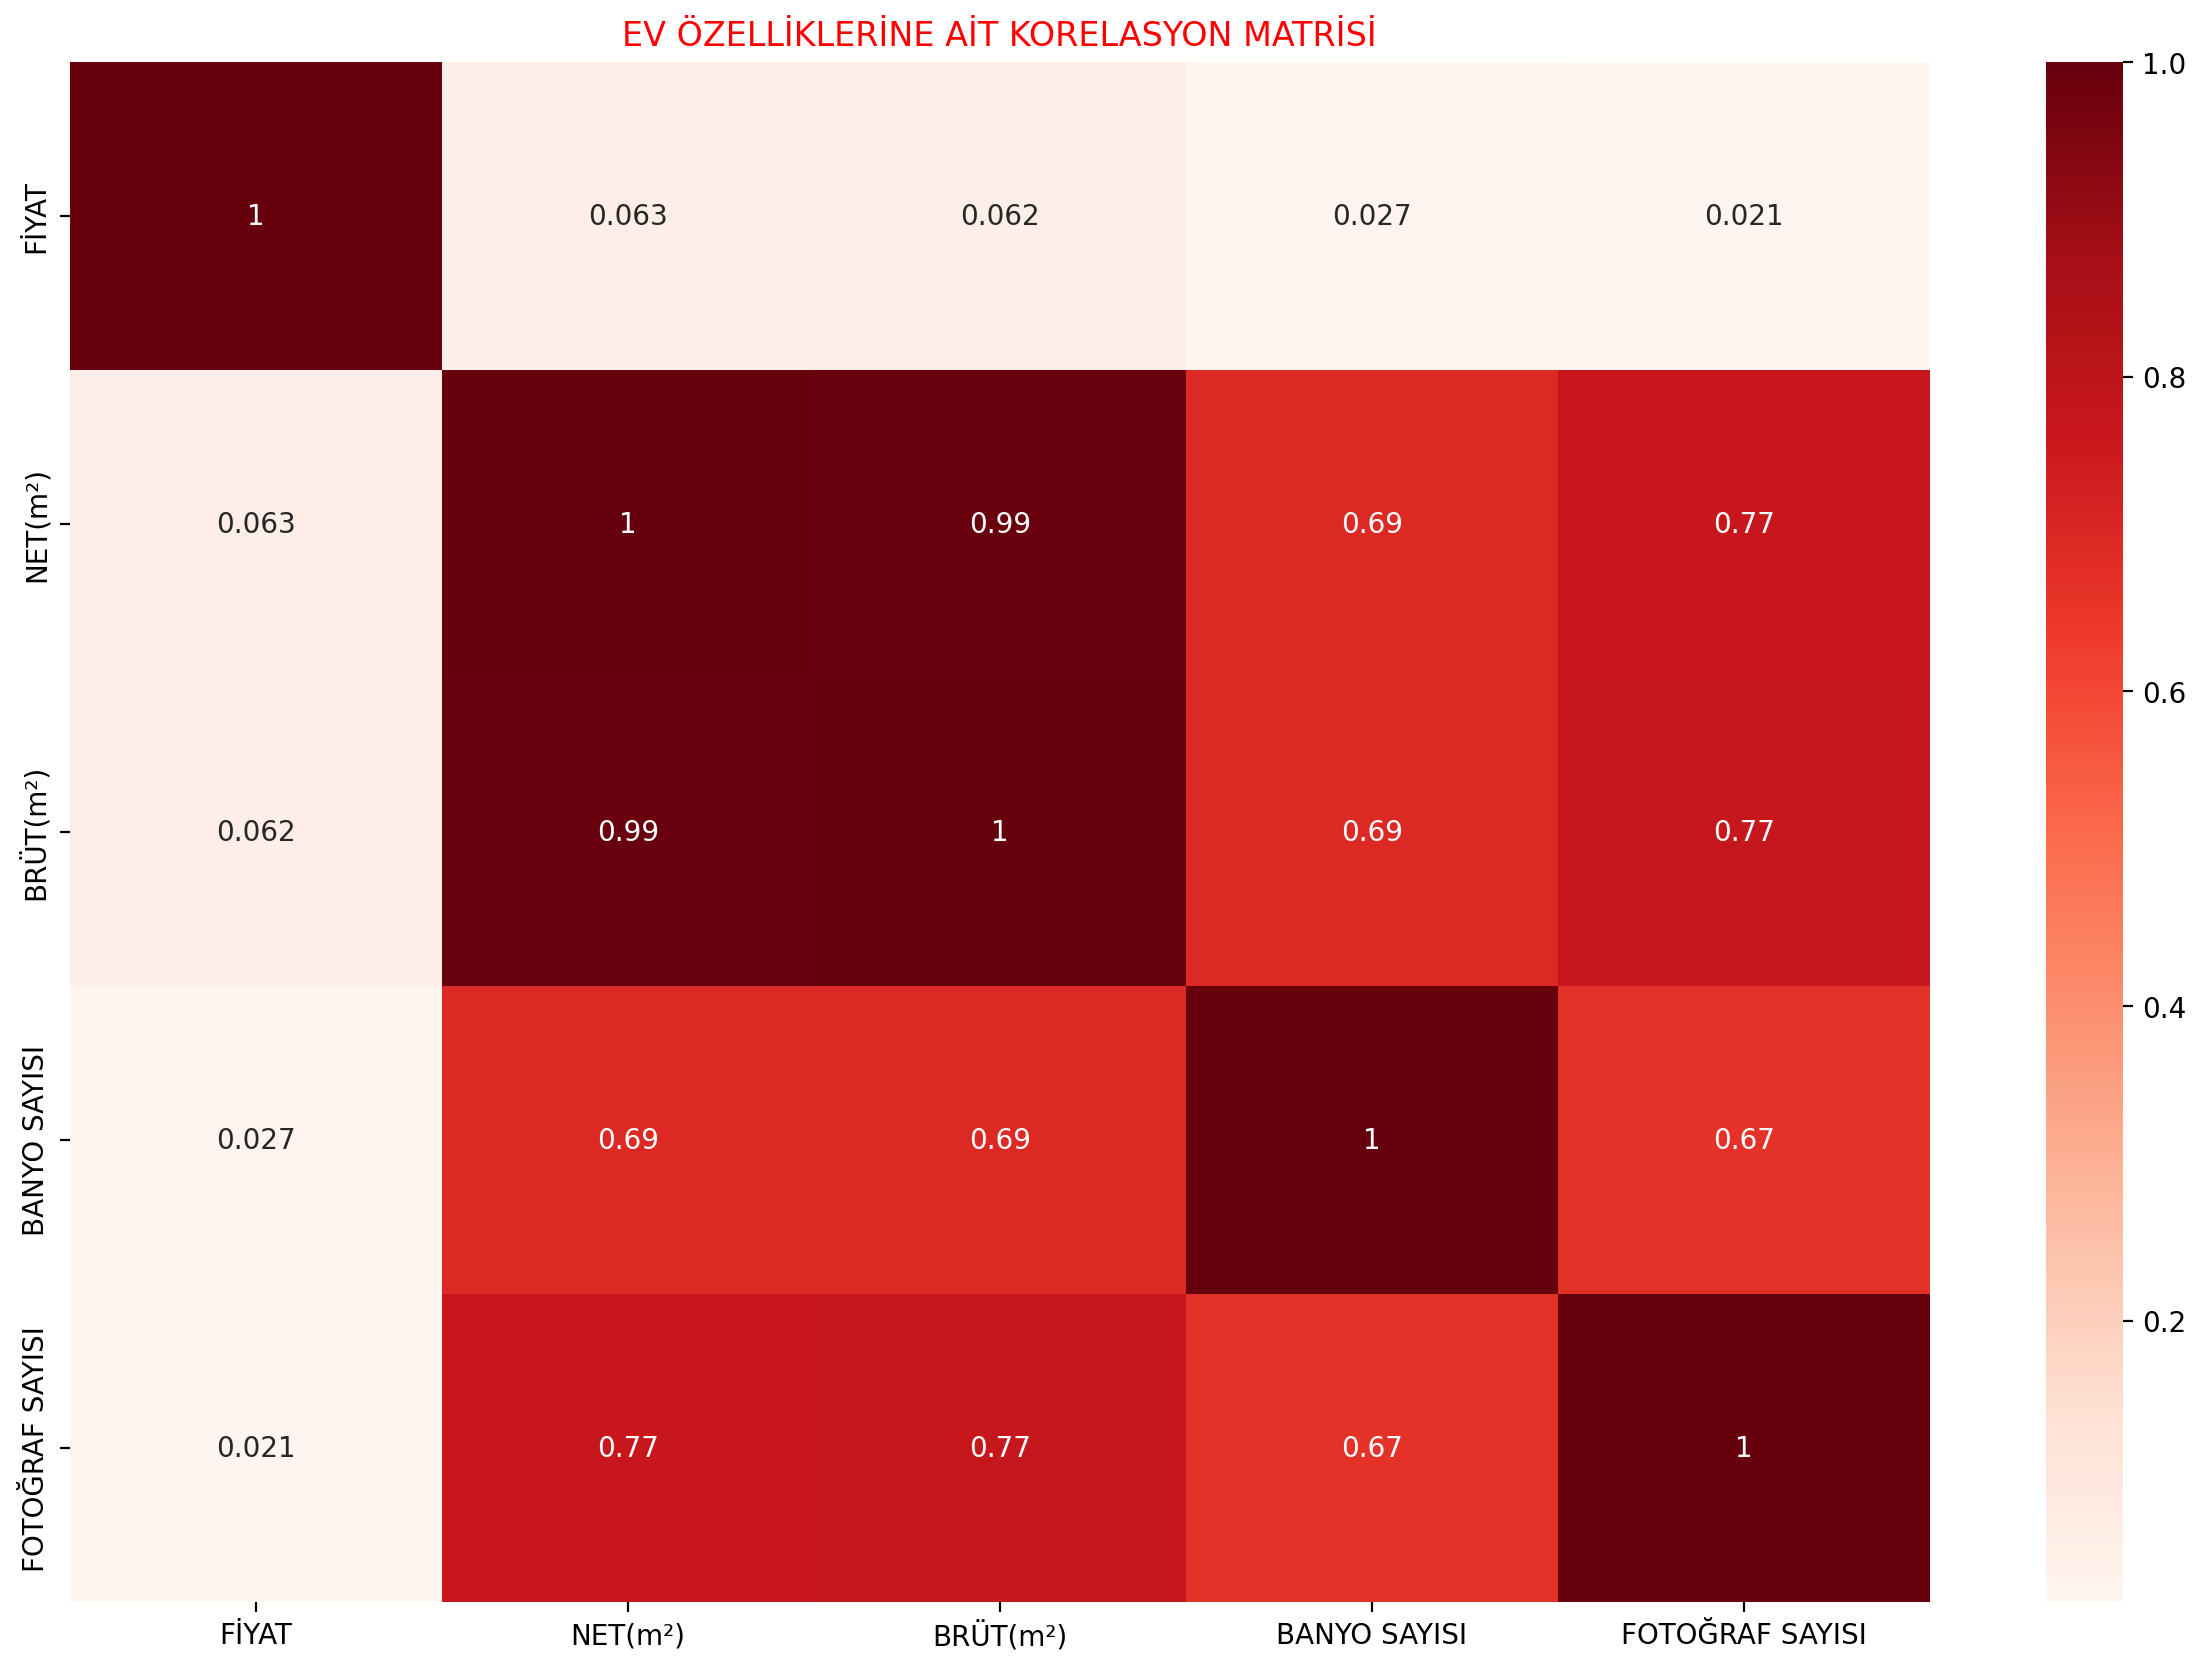

In [38]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EV ÖZELLİKLERİNE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(DF.corr(), cmap="Reds", annot=True)

In [39]:
other_df = new_df.drop(columns=["NET(m²)","BRÜT(m²)","BANYO SAYISI","FOTOĞRAF SAYISI"])
other_df

,FİYAT,ODA,MAHALLE_1,MAHALLE_2,MAHALLE_3,MAHALLE_Aydınlıkevler,MAHALLE_Boztepe,MAHALLE_Cumhuriyet,MAHALLE_Fatih,MAHALLE_Gazipaşa,...,MAHALLE_Sanayi,MAHALLE_Soğuksu,MAHALLE_Yalıncak,MAHALLE_Yenicuma,MAHALLE_Yenimahalle,MAHALLE_Çilekli,MAHALLE_Çukurçayır,MAHALLE_Üniversite,MAHALLE_İnönü,MAHALLE_İskenderpaşa
0,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,9000,4,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,850000,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
866,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
867,22500,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
868,8500,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: title={'center': 'EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ'}>

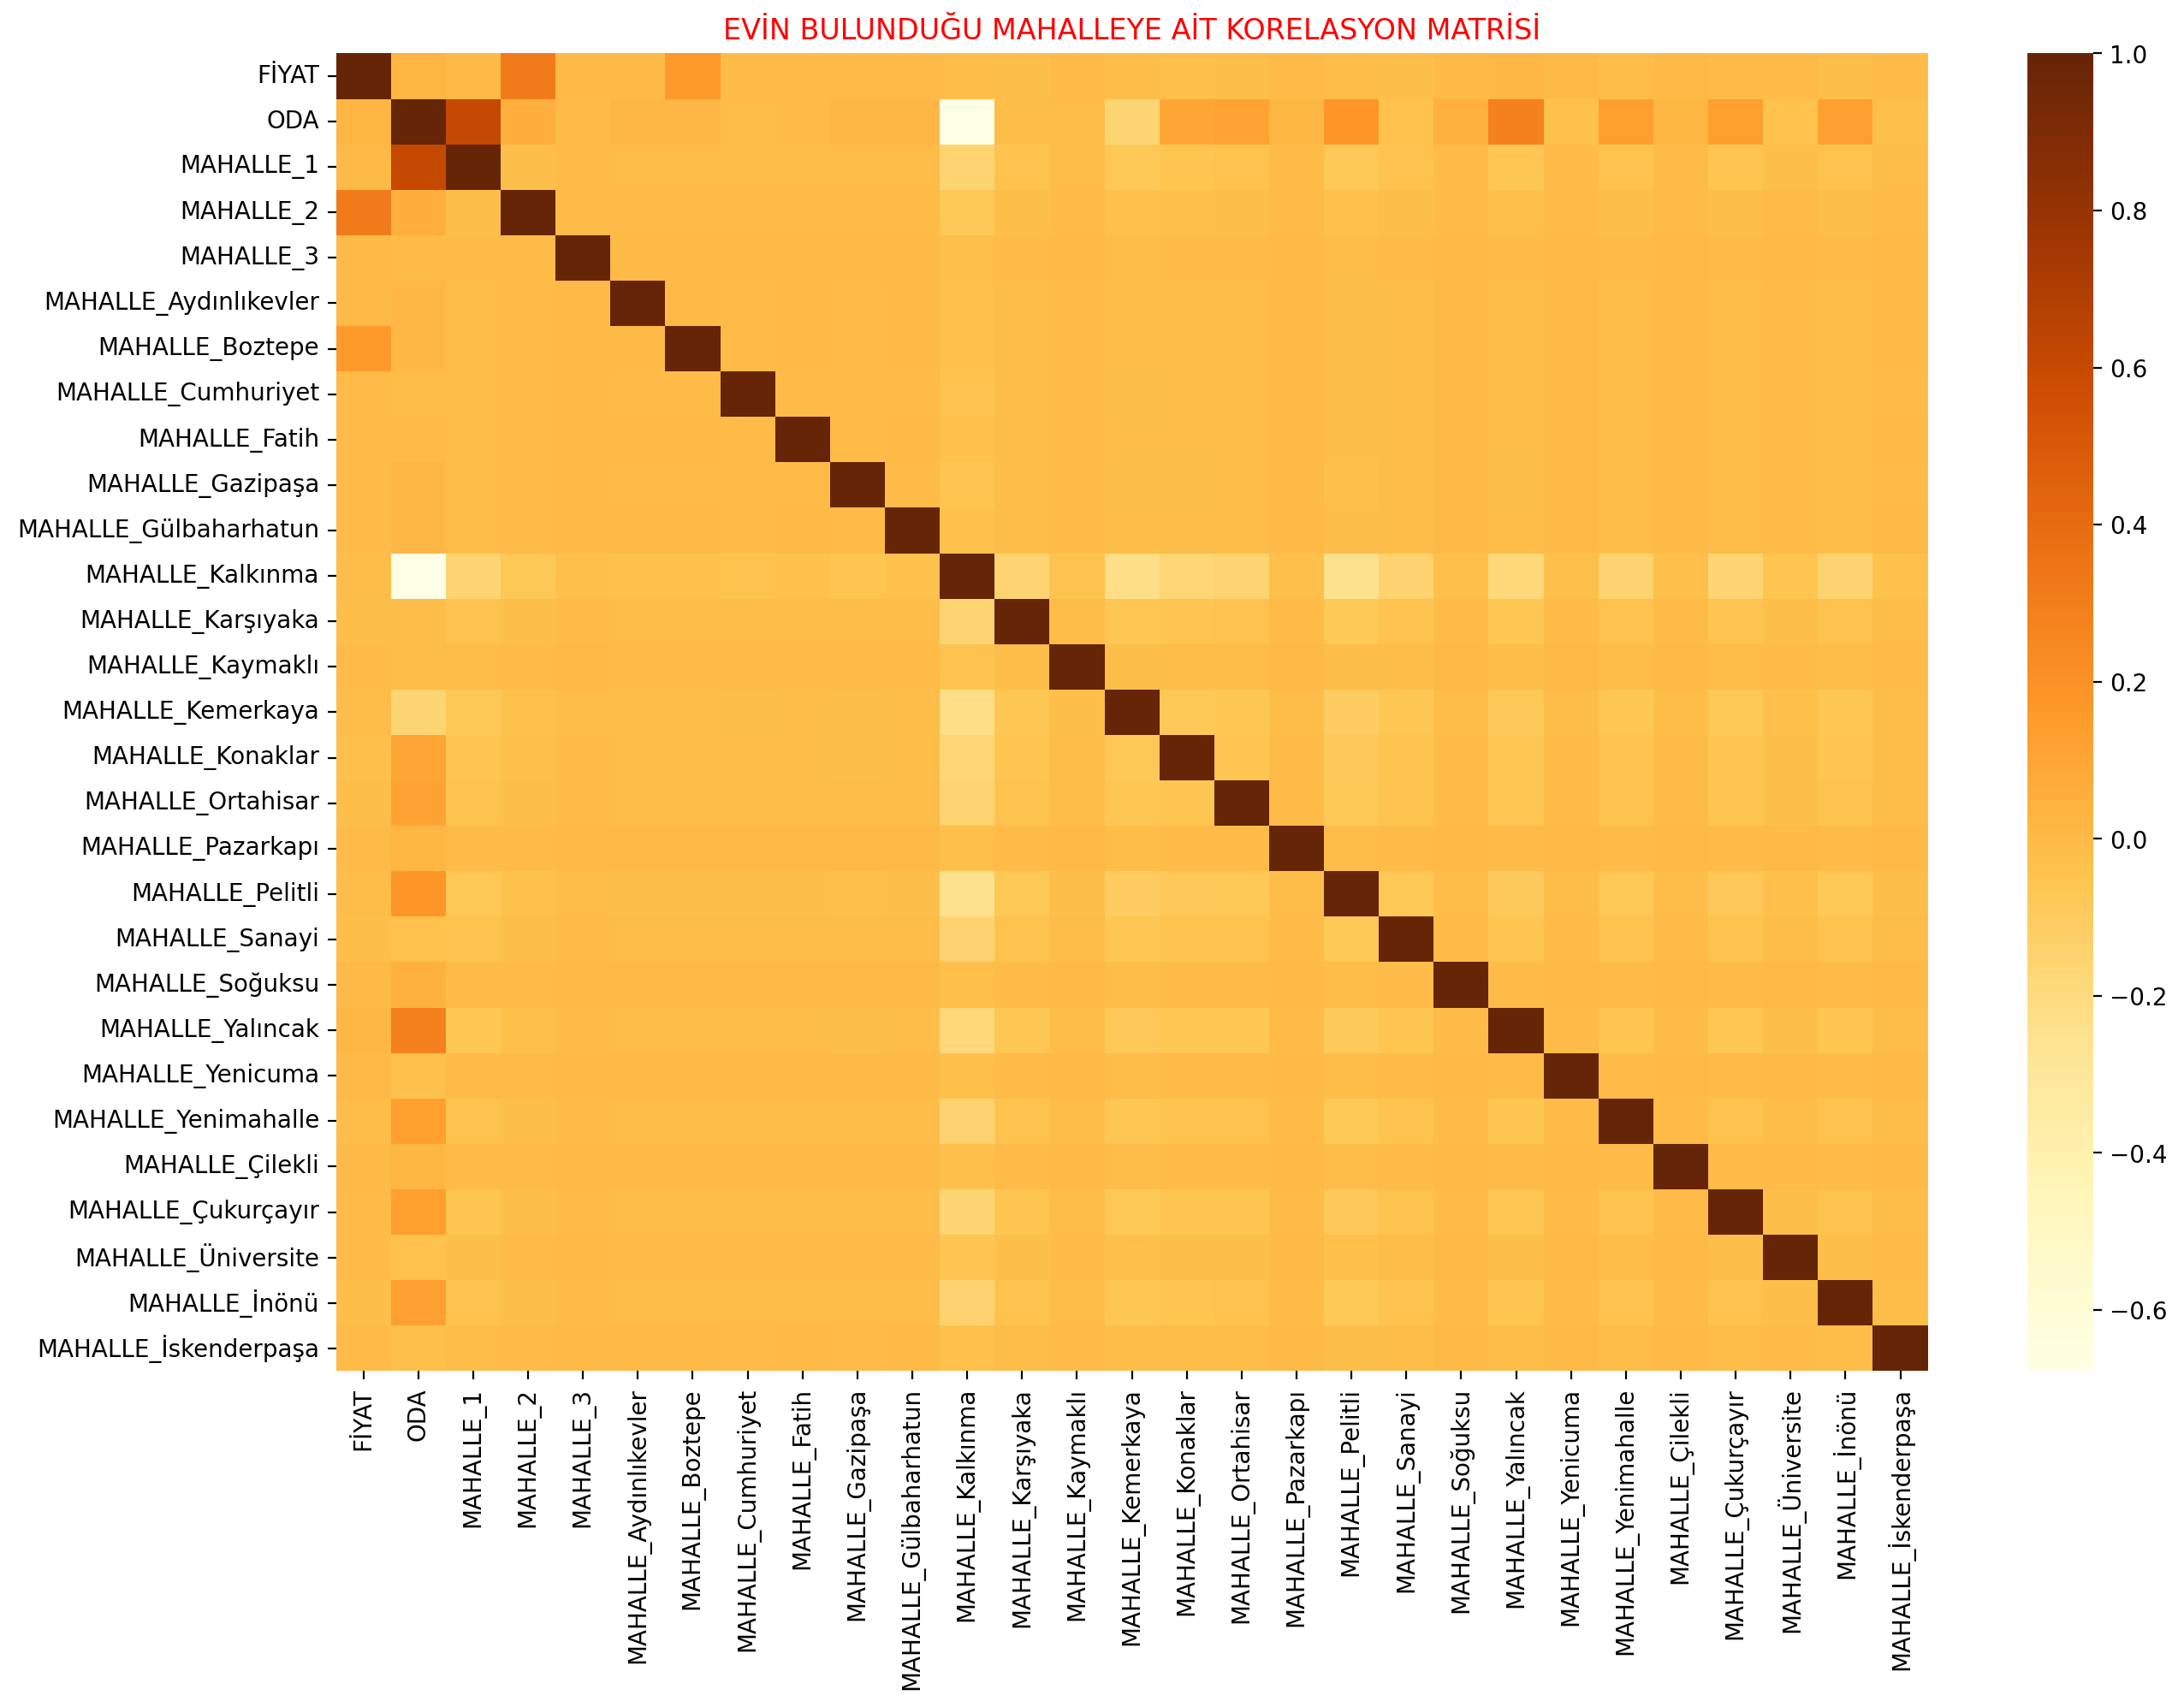

In [40]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("EVİN BULUNDUĞU MAHALLEYE AİT KORELASYON MATRİSİ", c="red")
sns.heatmap(other_df.corr(), cmap="YlOrBr")

## Linear Regression

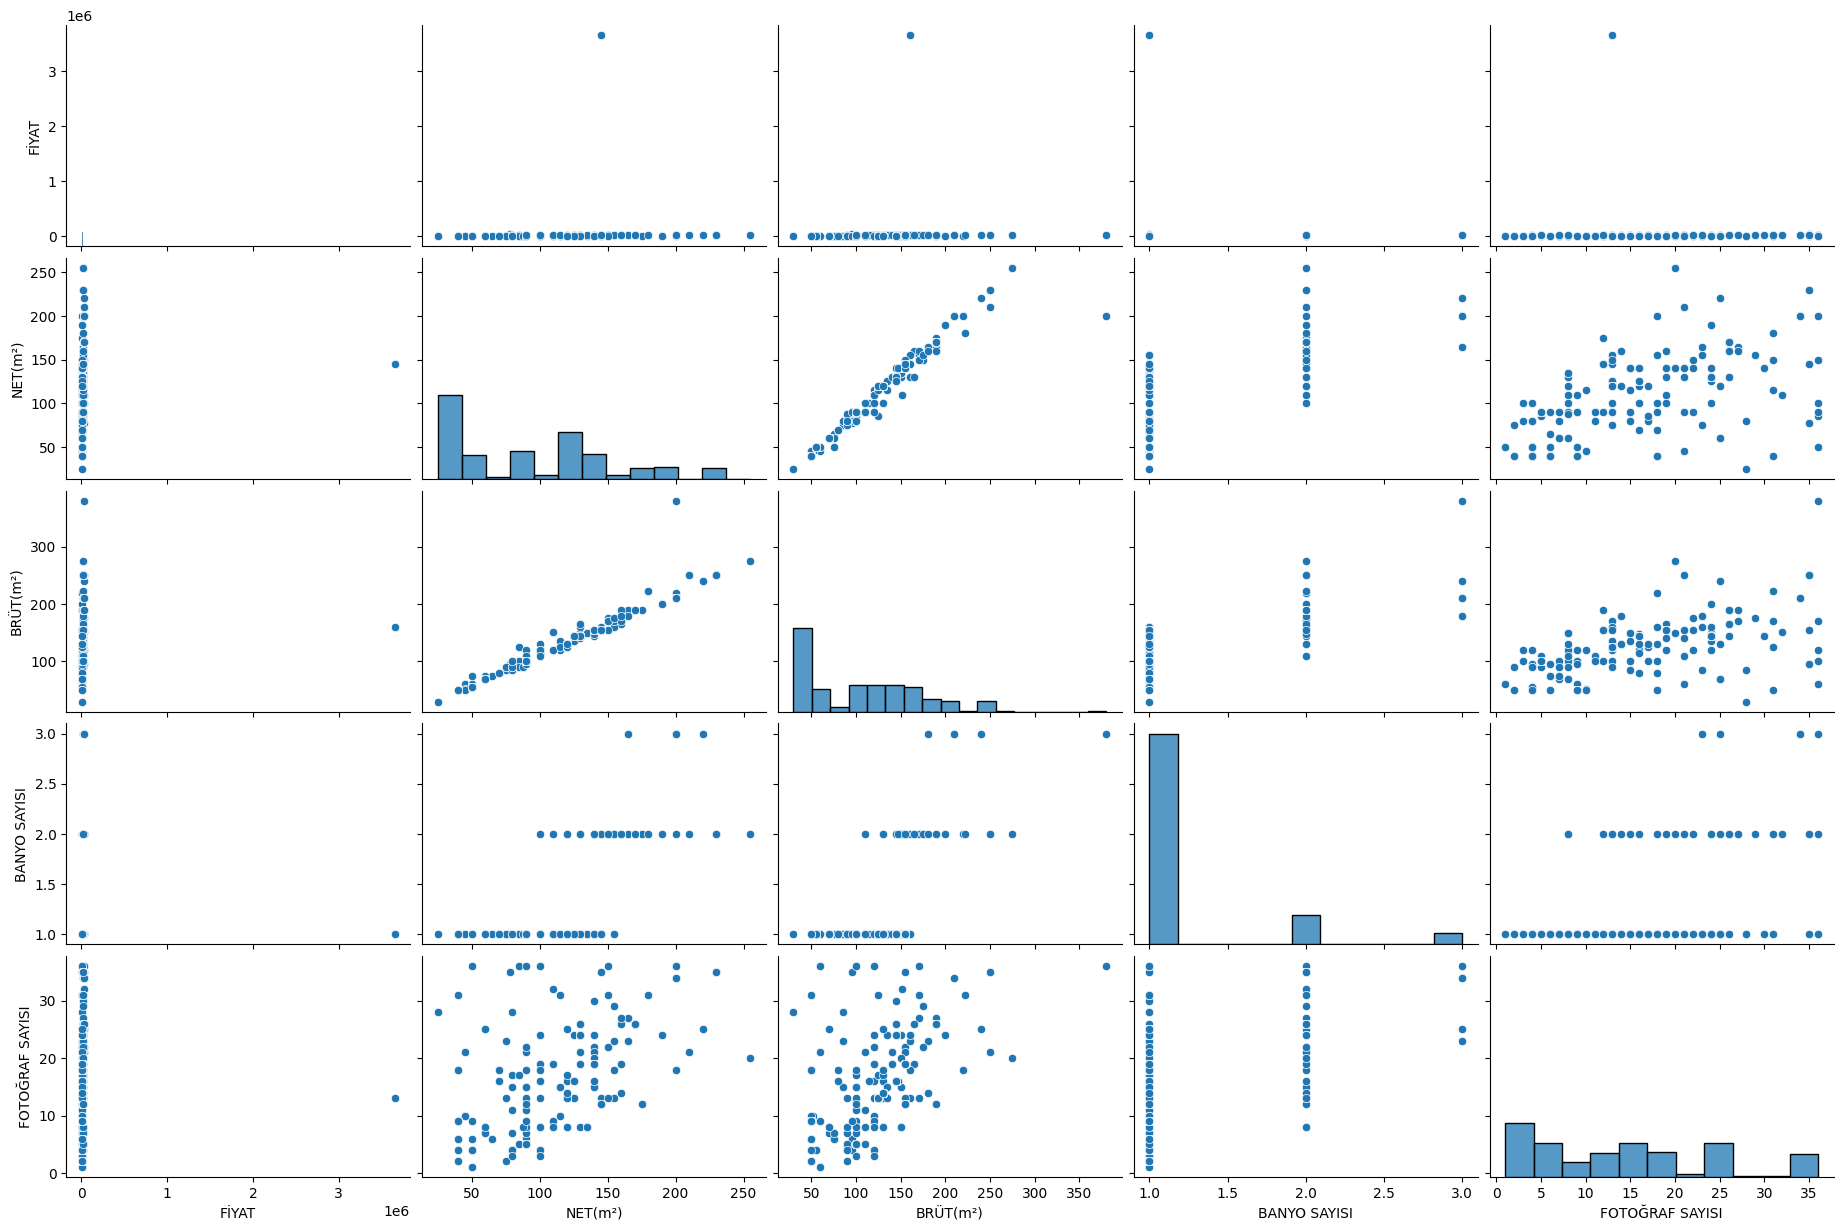

In [41]:
sns.pairplot(DF, aspect=1.5)

In [42]:
X = new_df.iloc[:,1:]
Y = new_df.iloc[:,:1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=20)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)
pred = lr_model.predict(x_val)

print("MSE Value: ", np.mean((pred - y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(x_test, y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(x_val, y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  6036793482.637093 

R^2 Score Value (Test):  -211.576640739991 

R^2 Score Value (Validation):  -170.41255412537146 

Coefficients:
 [[ 1.38977957e+03  9.43310352e+02 -5.42375308e+04 -8.98420043e+04
  -1.10499370e+03 -4.94462923e+04  4.63385070e+05 -5.09172559e+04
  -1.02803405e+05  8.77972475e+05 -3.94946003e+04 -7.47447185e+04
  -6.68227670e+04 -5.50122486e+04  1.25232267e+04 -5.71556116e+04
  -5.38977837e+04 -3.62235451e+04 -1.03199166e+05 -6.84742752e+04
  -7.05792689e+04 -7.40311071e+04  2.89285200e+04 -7.27595761e-12
  -2.69675899e+03 -4.00939037e+04 -6.13627171e+04 -1.09317138e+05
  -1.08238649e+05 -5.13428086e+04 -8.44573801e+04 -2.24978913e+04]]


In [43]:
print(new_df.columns)

Index(['FİYAT', 'NET(m²)', 'BRÜT(m²)', 'ODA', 'BANYO SAYISI',
       'FOTOĞRAF SAYISI', 'MAHALLE_1', 'MAHALLE_2', 'MAHALLE_3',
       'MAHALLE_Aydınlıkevler', 'MAHALLE_Boztepe', 'MAHALLE_Cumhuriyet',
       'MAHALLE_Fatih', 'MAHALLE_Gazipaşa', 'MAHALLE_Gülbaharhatun',
       'MAHALLE_Kalkınma', 'MAHALLE_Karşıyaka', 'MAHALLE_Kaymaklı',
       'MAHALLE_Kemerkaya', 'MAHALLE_Konaklar', 'MAHALLE_Ortahisar',
       'MAHALLE_Pazarkapı', 'MAHALLE_Pelitli', 'MAHALLE_Sanayi',
       'MAHALLE_Soğuksu', 'MAHALLE_Yalıncak', 'MAHALLE_Yenicuma',
       'MAHALLE_Yenimahalle', 'MAHALLE_Çilekli', 'MAHALLE_Çukurçayır',
       'MAHALLE_Üniversite', 'MAHALLE_İnönü', 'MAHALLE_İskenderpaşa'],
      dtype='object')


In [44]:
x = new_df.loc[:,["NET(m²)", "BRÜT(m²)", "ODA",]]
y = new_df.iloc[:,:1]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=20)
X_train, X_val, Y_train, Y_val = train_test_split(x, y, test_size=0.25, random_state=20)

lr_model = LinearRegression()

lr_model.fit(X_train, Y_train)
new_pred = lr_model.predict(X_val)

print("MSE Value: ", np.mean((new_pred - Y_val)**2), "\n")

print("R^2 Score Value (Test): ", lr_model.score(X_test, Y_test), "\n")

print("R^2 Score Value (Validation): ", lr_model.score(X_val, Y_val), "\n")

print("Coefficients:\n", lr_model.coef_)

MSE Value:  143980091.65850583 

R^2 Score Value (Test):  -3.2292900784739142 

R^2 Score Value (Validation):  -3.0882623076926006 

Coefficients:
 [[   530.14724814   -134.80701269 -13730.7885373 ]]


In [45]:
scaler = StandardScaler()

In [46]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)

In [47]:
lr_model_ridge = Ridge(alpha=0.05)
lr_model_ridge.fit(x_train_scaled, y_train)

Ridge(alpha=0.05)

In [48]:
print("R^2 Score Value (Test): ", lr_model_ridge.score(x_test_scaled, y_test), "\n")
print("R^2 Score Value (Validation): ", lr_model_ridge.score(x_val_scaled, y_val))

R^2 Score Value (Test):  -210.82418855774583 

R^2 Score Value (Validation):  -169.80464541626978


In [49]:
warnings.simplefilter('ignore', ConvergenceWarning)
lr_model_lasso = Lasso(alpha=0.1, max_iter=10000)
lr_model_lasso.fit(x_train_scaled, y_train)

Lasso(alpha=0.1, max_iter=10000)

In [50]:
print("R^2 Score Value (Test): ", lr_model_lasso.score(x_test_scaled, y_test), "\n")
print("R^2 Score Value (Validation): ", lr_model_lasso.score(x_val_scaled, y_val))

R^2 Score Value (Test):  -210.75887100861377 

R^2 Score Value (Validation):  -169.75897660302226
